In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.plotting import plot_decision_regions

dataset=pd.read_csv(r"C:\Users\Shubham Pandey\Downloads\Social_Network_Ads (1).csv")
dataset.head()


,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [19]:
x= dataset.iloc[:,:-1]
y= dataset["Purchased"]

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

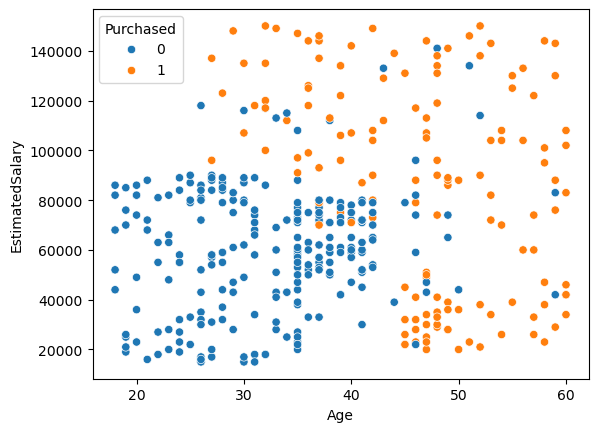

In [33]:
sns.scatterplot(x=dataset["Age"], y=dataset["EstimatedSalary"], hue=dataset["Purchased"])

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x=pd.DataFrame(scaler.transform(x) , columns=x.columns)

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [37]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier(max_depth=3, criterion="entropy", random_state=42)
dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [38]:
dt.score(x_test, y_test)*100    

91.25

In [40]:
dt.score(x_train, y_train)*100

91.875

In [41]:
dt.predict([[35,20000]])

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

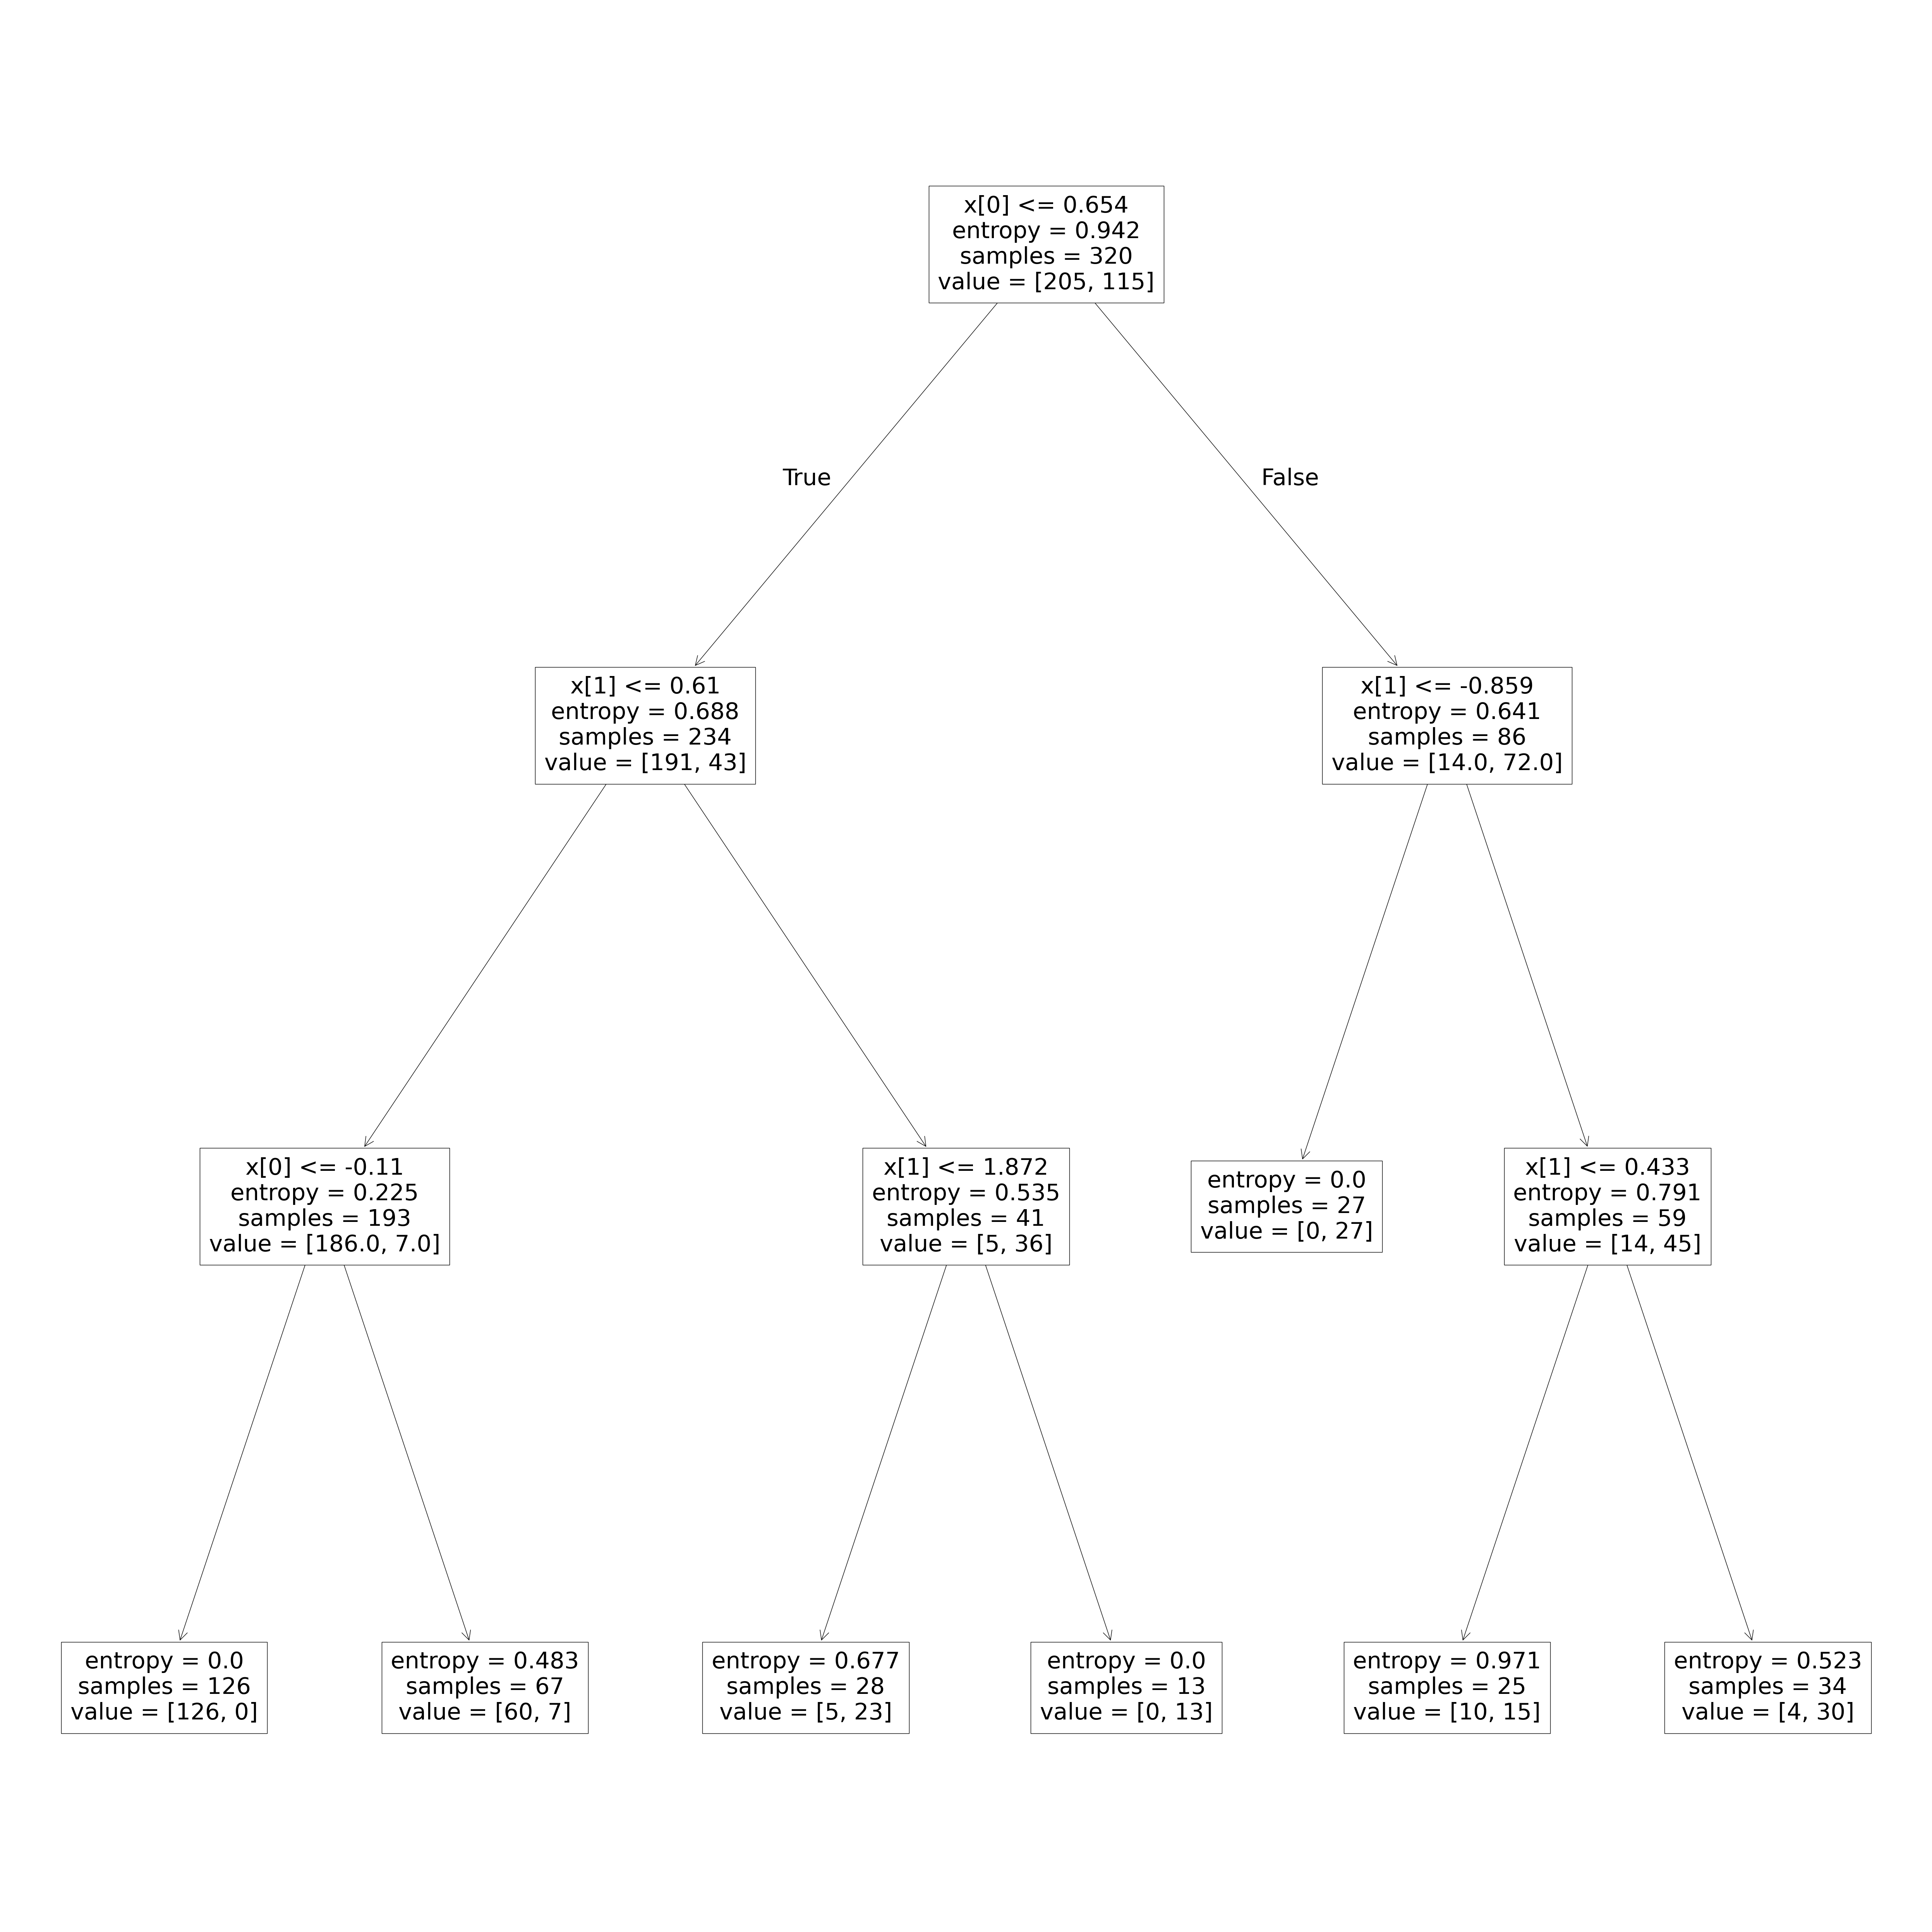

In [42]:
plt.figure(figsize=(50, 50))  

plot_tree( dt)
plt.tight_layout()
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Axes: >

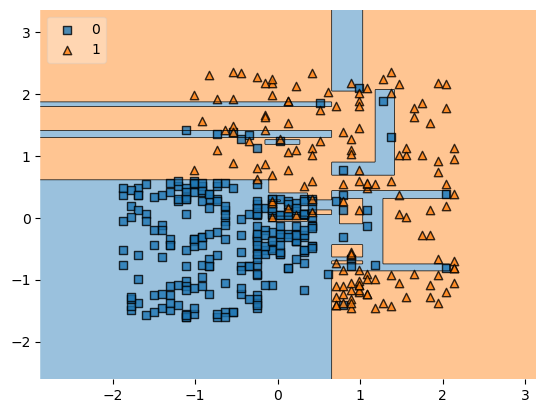

In [35]:
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=dt, legend=2)

pruning -> post pruning and pre pruning

when testing and training accuracy is not equal or having high different between their percentage that condition is called overfiting , to remove over fitting we use pruning , pruning are of two types post pruning and pre pruning


In [36]:
for i in range(1,20):
    dt2= DecisionTreeClassifier(max_depth=i)
    dt2.fit(x_train, y_train)
    print(dt2.score(x_train, y_train)*100, dt2.score(x_test, y_test)*100,i)


82.1875 90.0 1
91.875 91.25 2
91.875 91.25 3
93.125 91.25 4
93.4375 90.0 5
95.0 86.25 6
96.875 85.0 7
97.1875 85.0 8
98.125 85.0 9
98.4375 85.0 10
99.0625 83.75 11
99.0625 83.75 12
99.375 83.75 13
99.6875 83.75 14
99.6875 83.75 15
99.6875 83.75 16
99.6875 83.75 17
99.6875 83.75 18
99.6875 83.75 19


for training and testing are approximatly equal at 2nd and 3rd show , now we change depth to 2 or 3